# Heart Tor Model

In [1]:
import numpy as np 


import matplotlib.pyplot as plt

import pickle



import os, sys
rootpath = os.path.join(os.getcwd(), '..')
sys.path.append(rootpath)


from scipy.sparse import diags, coo_matrix
from scipy import sparse
import jax.numpy as jnp

import jax
from jax import lax, vmap, jit
import jax.random as random
from jax.experimental import sparse
rootpath = os.path.join(os.getcwd(), '..')
codepath = os.path.join(os.getcwd(), '../codebase') #directory where you have the class file
sys.path.append(rootpath)
sys.path.append(codepath)
from codebase.FHN_model import * 


In [3]:
heart_toymodel = FHN_model( 
                 N=200,
                 organ='heart',

                 adjacency_seed=1000,
                 stimulus_time=2000)    

In [13]:
heart_toymodel.solve_with_EulerMaruyama_fori(T=10000,output_times=10000)

In [4]:
heart_arrhythmia = FHN_model(N=200,
                            organ='heart',
                            adjacency_seed=1000,
                            p=0.5,
                            stimulus_time=2000)
heart_asystole = FHN_model(N=200,
                            organ='heart',
                            adjacency_seed=1000,
                            p=0.7,
                            stimulus_time=2000)

In [20]:
heart_arrhythmia.solve_with_EulerMaruyama_fori(T=10000,output_times=10000)
heart_asystole.solve_with_EulerMaruyama_fori(T=10000,output_times=10000)

In [23]:
folder='data/simulations/V_p=0.pkl'
with open(folder, 'wb') as f:
    pickle.dump(np.array(heart_toymodel.vs), f)
folder='data/simulations/V_p=0.5.pkl'
with open(folder, 'wb') as f:
    pickle.dump(np.array(heart_arrhythmia.vs), f)
folder='data/simulations/V_p=0.7.pkl'
with open(folder, 'wb') as f:
    pickle.dump(np.array(heart_asystole.vs), f)

In [5]:

folder='data/simulations/V_p=0.pkl'
with open(folder, 'rb') as f:
    heart_toymodel.vs = pickle.load(f)
folder='data/simulations/V_p=0.5.pkl'
with open(folder, 'rb') as f:
    heart_arrhythmia.vs = pickle.load(f)
folder='data/simulations/V_p=0.7.pkl'
with open(folder, 'rb') as f:
    heart_asystole.vs = pickle.load(f)

In [18]:
ECG_0=np.array(heart_toymodel.vs[ :, :].sum(axis=1)/1000)
ECG_05=np.array(heart_arrhythmia.vs[ :, :].sum(axis=1)/1000)
ECG_07=np.array(heart_asystole.vs[ :, :].sum(axis=1)/1000)
t=np.arange(0,10000,1)

In [19]:

np.savetxt('data/FHN_2D_diffusion_p=0_collective_signal.txt', np.column_stack((t, ECG_0)), header='time collective signal', comments='')
np.savetxt('data/FHN_2D_diffusion_p=0.5_collective_signal.txt', np.column_stack((t, ECG_05)), header='time collective signal', comments='')
np.savetxt('data/FHN_2D_diffusion_p=0.7_collective_signal.txt', np.column_stack((t, ECG_07)), header='time collective signal', comments='')

In [31]:
def raster_plot(array):
    start_times = []
    durations = []
    indices = []
    for i in range(array.shape[0]):
        signal = array[i, :]
        start_time = np.where(np.diff(signal, prepend=0) == 1)[0]
        end_time = np.where(np.diff(signal, append=0) == -1)[0]
        for s, e in zip(start_time, end_time):
            start_times.append(s)
            durations.append(e - s)
            indices.append(i)

    start_times = np.array(start_times)
    durations = np.array(durations)
    indices = np.array(indices)
    return start_times, durations, indices


In [21]:

N=heart_toymodel.N
raster_0=np.where(heart_toymodel.vs > 0.8, 1, 0).T

start_times_0, durations_0, indices_0 = raster_plot(raster_0)

raster_1=np.where(heart_arrhythmia.vs > 0.8, 1, 0).T


start_times1, durations_1, indices_1 = raster_plot(raster_1)


raster_2=np.where(heart_asystole.vs > 0.8, 1, 0).T

start_times_2, durations_2, indices_2 = raster_plot(raster_2)



In [22]:
np.savetxt('data/FHN_2D_diffusion_p=0_raster.txt', np.column_stack((start_times_0,durations_0, indices_0)), header='time duration id', comments='')
np.savetxt('data/FHN_2D_diffusion_p=0.5_raster.txt', np.column_stack((start_times1, durations_1,indices_1)), header='time duration id', comments='')
np.savetxt('data/FHN_2D_diffusion_p=0.7_raster.txt', np.column_stack((start_times_2, durations_2,indices_2)), header='time duration id', comments='')

In [57]:

N=heart_toymodel.N
raster_0=np.where(heart_toymodel.vs > 0.8, 1, 0).reshape(10000, N,N).T
raster_0=raster_0[:, 20,:]

start_times_0, durations_0, indices_0 = raster_plot(raster_0)

raster_1=np.where(heart_arrhythmia.vs > 0.8, 1, 0).reshape(10000, N,N).T
raster_1=raster_1[:, 20,:]

start_times1, durations_1, indices_1 = raster_plot(raster_1)


raster_2=np.where(heart_asystole.vs > 0.8, 1, 0).reshape(10000, N,N).T
raster_2=raster_2[:, 20,:]

start_times_2, durations_2, indices_2 = raster_plot(raster_2)



In [ ]:
np.savetxt('data/Raster_plot_column_p=0.txt', np.column_stack((start_times_0,durations_0, indices_0)), header='times durations ids', comments='')
np.savetxt('data/Raster_plot_column_p=0.5.txt', np.column_stack((start_times1, durations_1,indices_1)), header='times durations ids', comments='')
np.savetxt('data/Raster_plot_column_p=0.7.txt', np.column_stack((start_times_2, durations_2,indices_2)), header='times durations ids', comments='')

In [59]:

N=heart_toymodel.N
raster_0=np.where(heart_toymodel.vs > 0.8, 1, 0).reshape(10000, N,N).T
raster_0=raster_0[20, :,:]

start_times_0, durations_0, indices_0 = raster_plot(raster_0)

raster_1=np.where(heart_arrhythmia.vs > 0.8, 1, 0).reshape(10000, N,N).T
raster_1=raster_1[20, :,:]

start_times1, durations_1, indices_1 = raster_plot(raster_1)


raster_2=np.where(heart_asystole.vs > 0.8, 1, 0).reshape(10000, N,N).T
raster_2=raster_2[20, :,:]

start_times_2, durations_2, indices_2 = raster_plot(raster_2)



In [61]:
np.savetxt('data/Raster_plot_row_p=0.txt', np.column_stack((start_times_0,durations_0, indices_0)), header='times durations ids', comments='')
np.savetxt('data/Raster_plot_row_p=0.5.txt', np.column_stack((start_times1, durations_1,indices_1)), header='times durations ids', comments='')
np.savetxt('data/Raster_plot_row_p=0.7.txt', np.column_stack((start_times_2, durations_2,indices_2)), header='times durations ids', comments='')

# Brain Toy model

In [ ]:
Brain_healthy= FHN_model(N=40000,
                        organ='brain',
                        m=0.005,
                        sigma=0.05,
                        adjacency_seed=1000)
Brain_epilepsy= FHN_model(N=40000,
                        organ='brain',
                        m=0.145,
                        sigma=0.05,
                        adjacency_seed=1000)

c:\Users\pelli\Projects\perspective_heart_and_brain\notebooks_figures_paper\..\codebase\FHN_model.py:158: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G, weight='weight')


In [23]:
Brain_healthy.solve_with_EulerMaruyama_fori(T=10000,output_times=10000)
Brain_epilepsy.solve_with_EulerMaruyama_fori(T=10000,output_times=10000)

In [24]:
folder='data/simulations/V_m=0.005.pkl'
with open(folder, 'wb') as f:
    pickle.dump(np.array(Brain_healthy.vs), f)
folder='data/simulations/V_m=0.145.pkl'
with open(folder, 'wb') as f:
    pickle.dump(np.array(Brain_epilepsy.vs), f)

In [25]:

folder='data/simulations/V_m=0.005.pkl'
with open(folder, 'rb') as f:
    Brain_healthy.vs = pickle.load(f)
folder='data/simulations/V_m=0.145.pkl'
with open(folder, 'rb') as f:
    Brain_epilepsy.vs = pickle.load(f)


In [26]:
EEG_005=np.array(Brain_healthy.vs[ :, :].sum(axis=1)/1000)
EEG_145=np.array(Brain_epilepsy.vs[ :, :].sum(axis=1)/1000)
t=np.arange(0,10000,1)

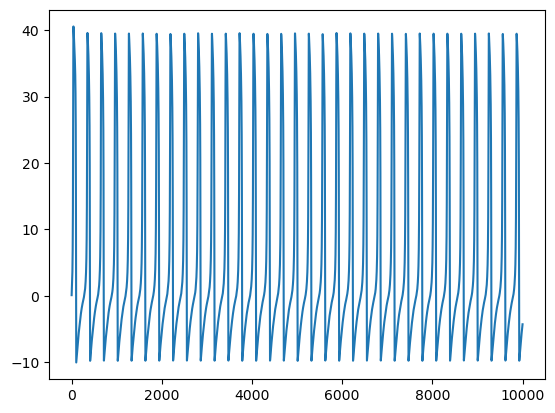

In [28]:
plt.plot(t, EEG_145)

In [29]:

#np.savetxt('data/FHN_erdos_renyi_m=0.005_collective_signal.txt', np.column_stack((t, EEG_005)), header='time collective signal', comments='')
np.savetxt('data/FHN_erdos_renyi_m=0.145_collective_signal.txt', np.column_stack((t, EEG_145)), header='time collective signal', comments='')


In [ ]:

N=Brain_healthy.N
raster_0=np.where(Brain_healthy.vs > 0.5, 1, 0).T


start_times_0, durations_0, indices_0 = raster_plot(raster_0)

raster_1=np.where(Brain_epilepsy.vs > 0.5, 1, 0).T


start_times1, durations_1, indices_1 = raster_plot(raster_1)


In [33]:
np.savetxt('data/FHN_erdos_renyi_m=0.005_raster.txt', np.column_stack((start_times_0,durations_0, indices_0)), header='time duration id', comments='')
np.savetxt('data/FHN_erdos_renyi_m=0.145_raster.txt', np.column_stack((start_times1, durations_1,indices_1)), header='time duration id', comments='')
